In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
thres = threshold_otsu(a)
b = a > thres
c = label(b)
c1 = Image.fromarray(c)
iio.imsave('bird.png', c1)
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)
fig, ax =plt.subplots(ncols=1, nrows=1, figsize=(6,6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur,uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,edgecolor='black', linewidth=2)
    ax.add_patch(rect)
plt.show()


In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg =abs(data - nd.shift(data, (0,1), order=0))
plt.imshow(bmg)
plt.show

In [ ]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) +abs(b)
plt.imshow(bmg)
plt.show


In [ ]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib,pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)

    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC**2
    return R
data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()

In [ ]:
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))
    ho = np.zeros((R, 90), float)
    w = data + 0
    ok = 1
    theta = np.arange(90)/180.0 * np.pi
    tp = np.arange(90).astype(float)
    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else: 
            v,h = divmod(w.argmax(), H)
            y = V - v
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[v,h] = 0
    return ho
data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()

            



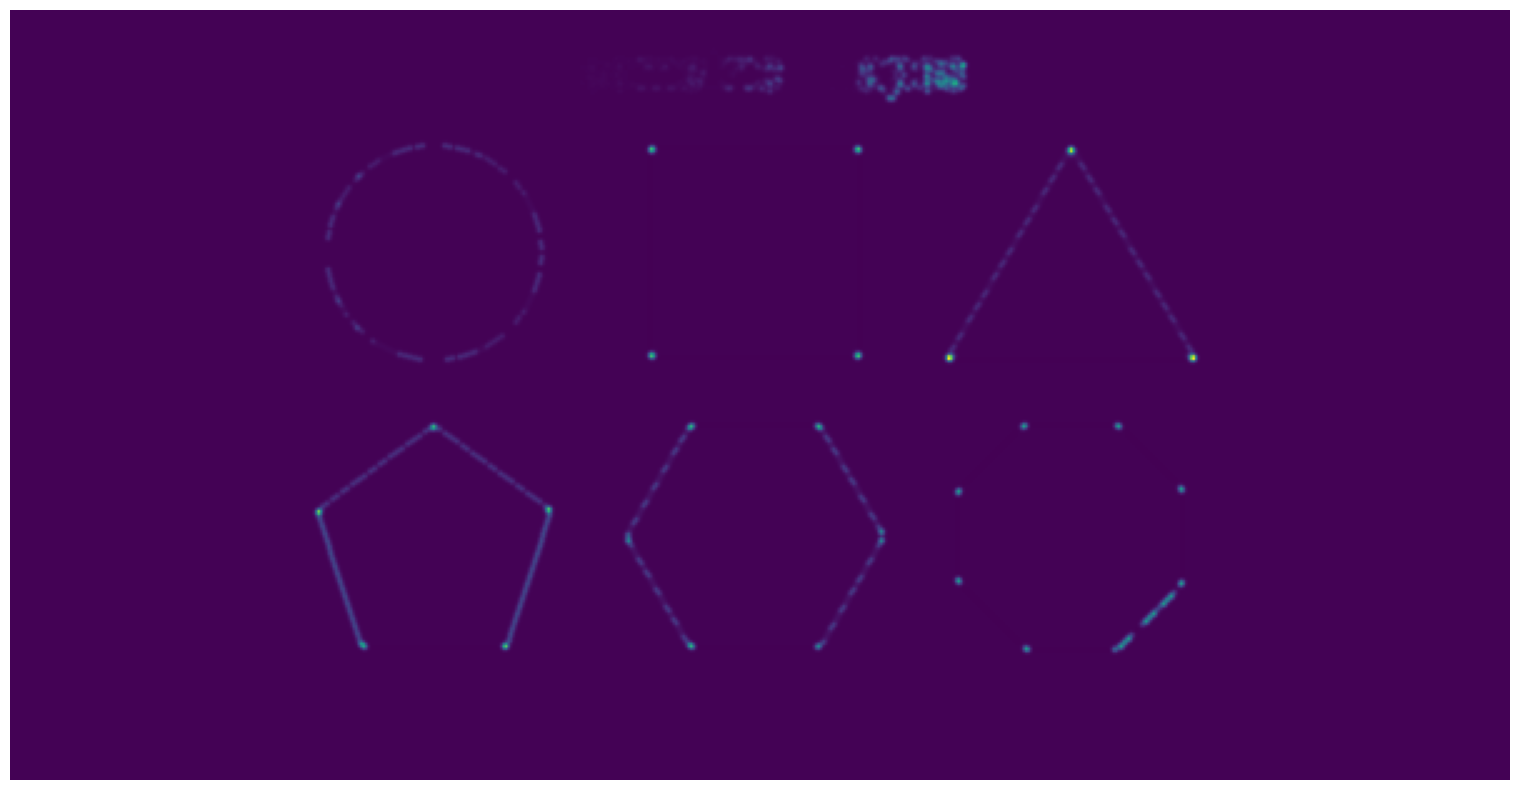

In [16]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.feature import corner_harris
from skimage.color import rgb2gray

data = iio.imread('bird.png')

# Xử lý ảnh màu/xám
if data.ndim == 3 and data.shape[2] == 3:
    image_gray = rgb2gray(data)
elif data.ndim == 3 and data.shape[2] == 4:
    image_gray = rgb2gray(data[:, :, :3])
else:
    image_gray = data

coordinate = corner_harris(image_gray, k=0.001)

plt.figure(figsize=(20, 10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()